# One-number metric (Wasserstein distance?)

In [1]:
from train_test_utils import LossDistribution

In [2]:
import os
from typing import List
import matplotlib.pyplot as plt

In [3]:
def all_plots_for_datafile(filepath: str) -> None:
    l = LossDistribution(filepath)
    l.plot_learning_curves()
    for epoch in [0, 15, 30]:
        l.plot_distribution_at_epoch(epoch)
    l.plot_wasserstein_vs_epoch()
    # l.plot_relmeandiff_vs_epoch()
    # l.plot_lqrtest_pvalue_vs_epoch()

## lorenz_size=13_window_len=5

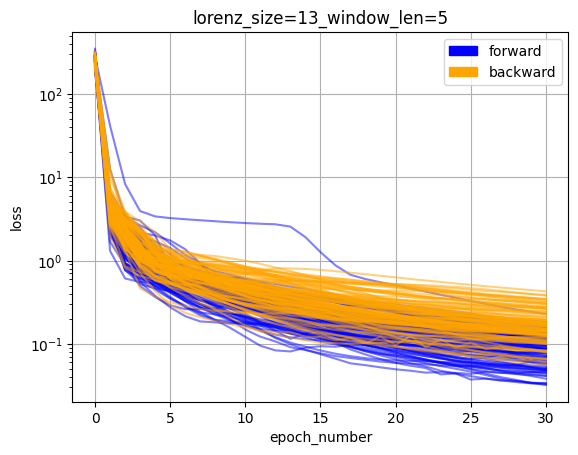

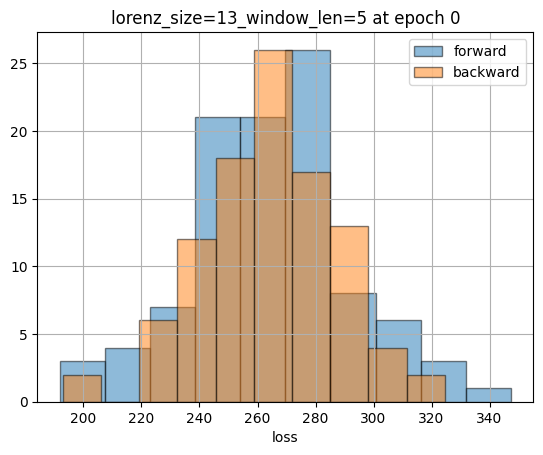

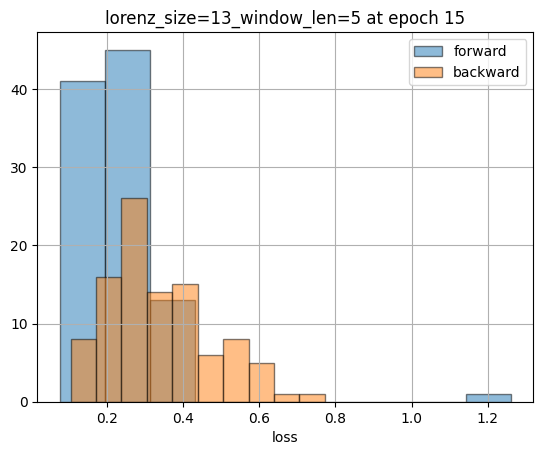

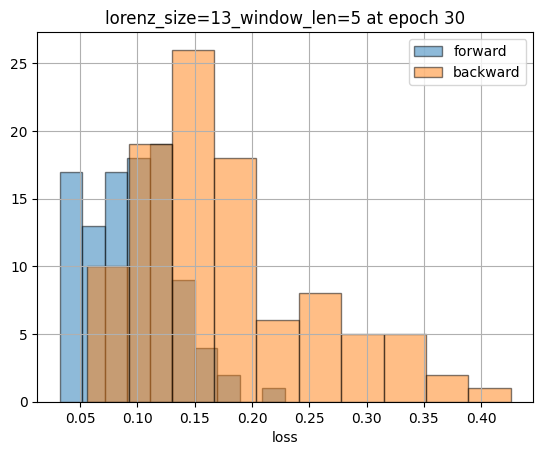

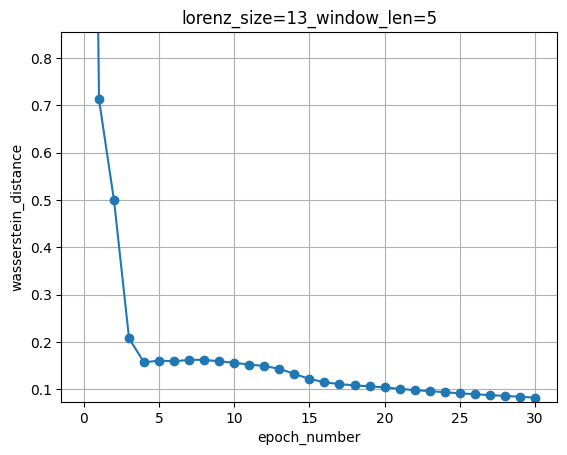

In [4]:
all_plots_for_datafile("20230507_distributions/lorenz_size=13_window_len=5.json")

## lorenz_size=13_window_len=12

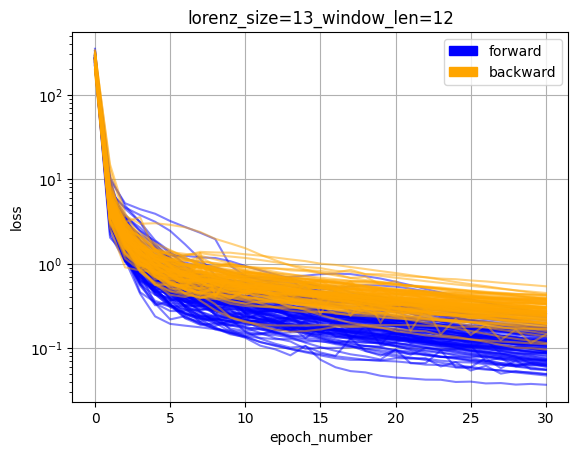

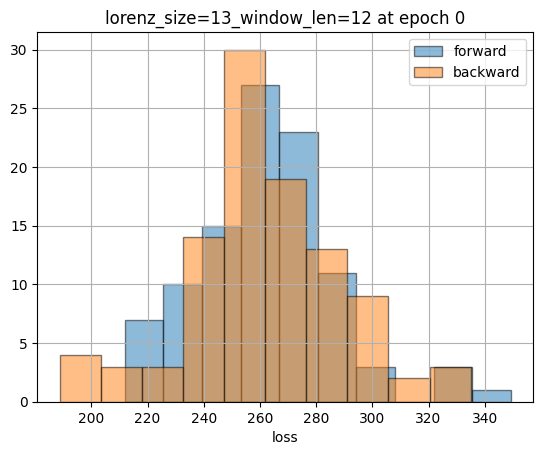

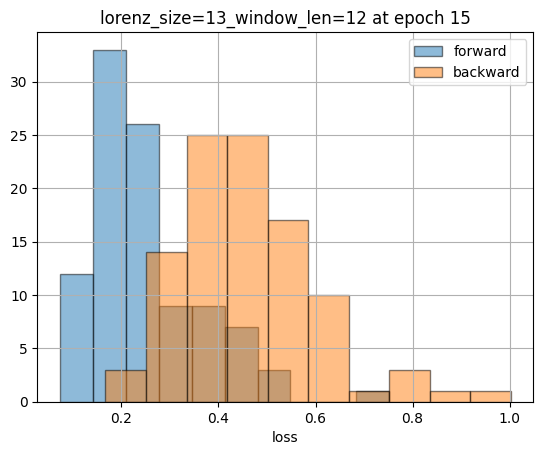

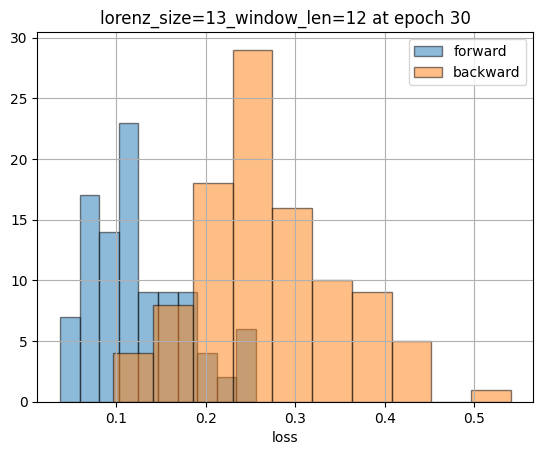

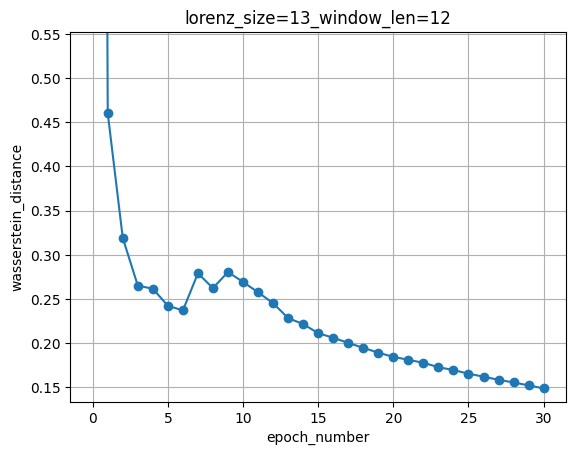

In [5]:
all_plots_for_datafile("20230507_distributions/lorenz_size=13_window_len=12.json")

## lorenz_size=13_window_len=25

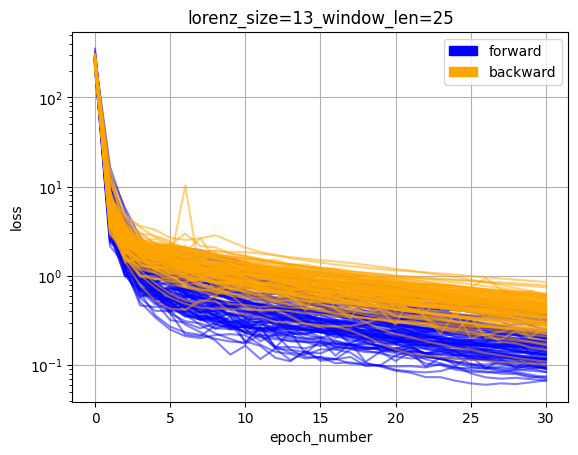

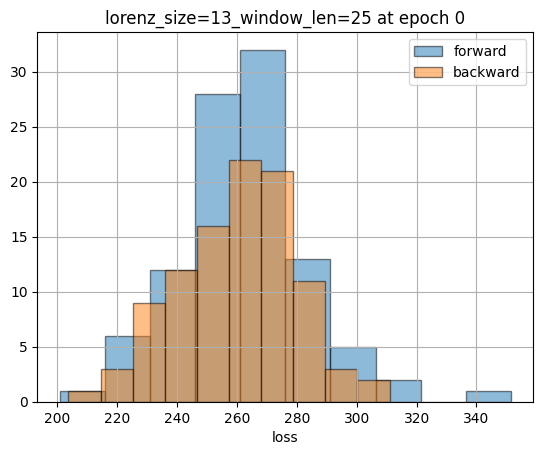

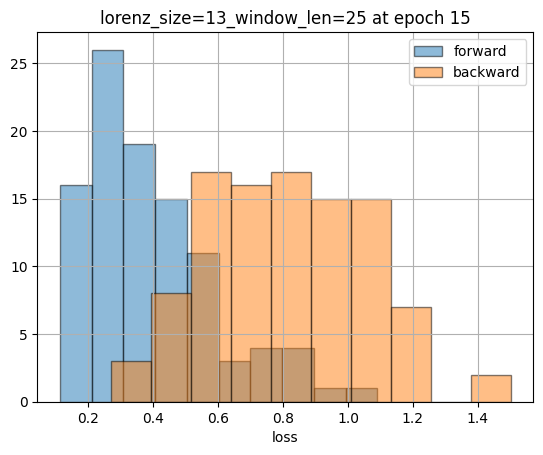

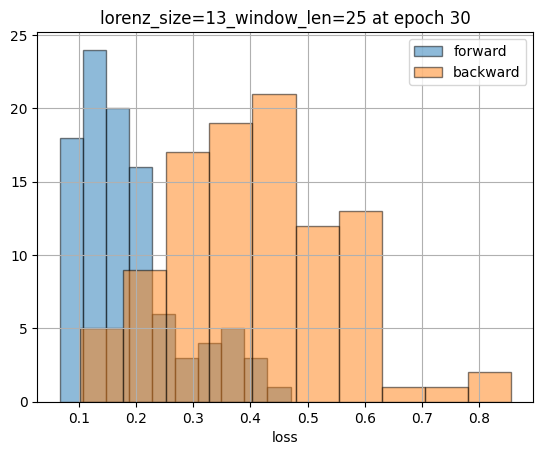

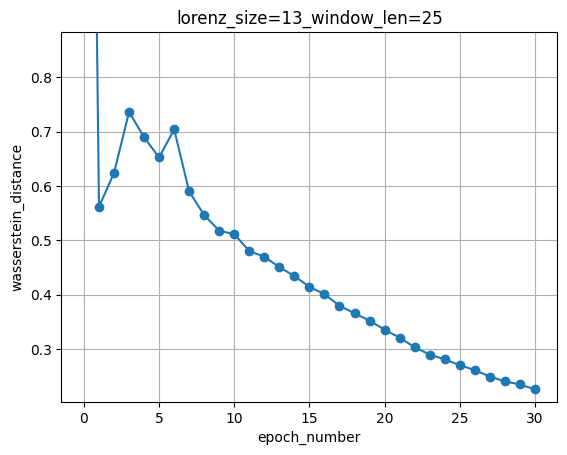

In [6]:
all_plots_for_datafile("20230507_distributions/lorenz_size=13_window_len=25.json")

## kepler_size=13_window_len=5

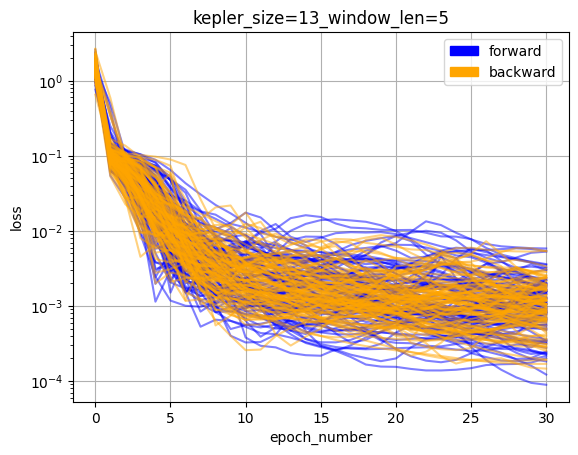

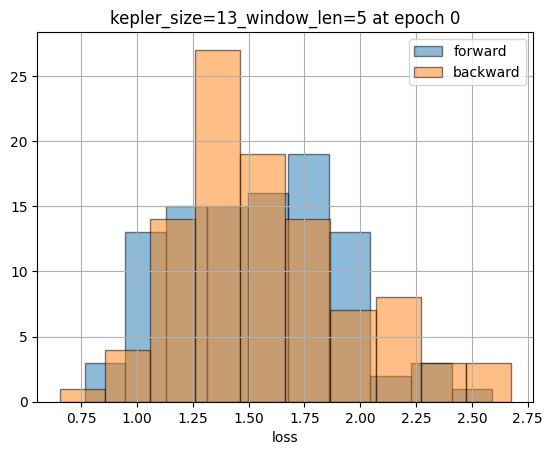

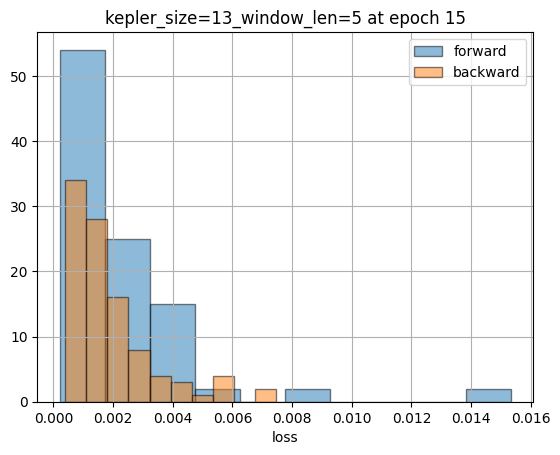

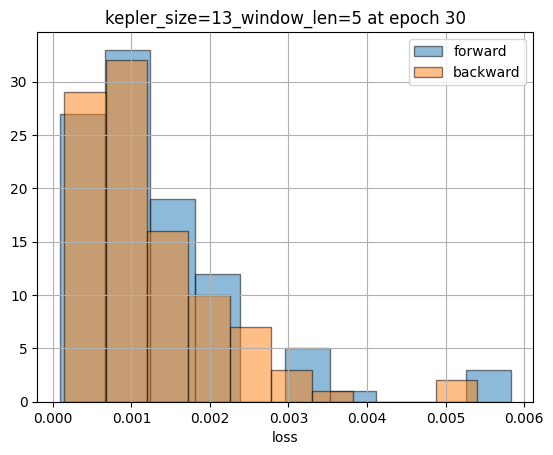

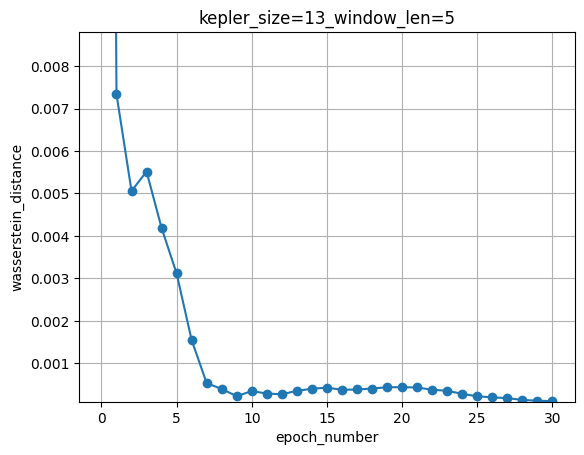

In [7]:
all_plots_for_datafile("20230507_distributions/kepler_size=13_window_len=5.json")

## kepler_size=13_window_len=12

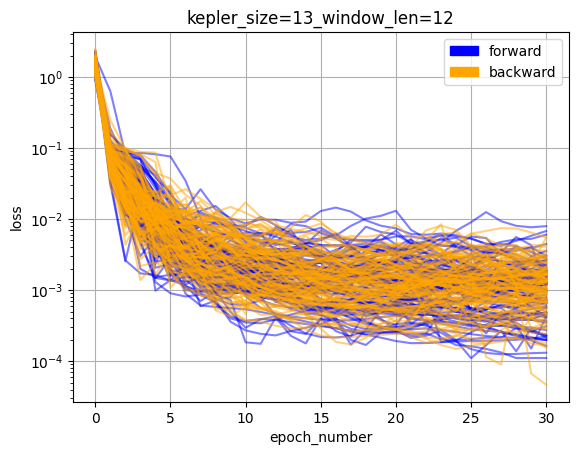

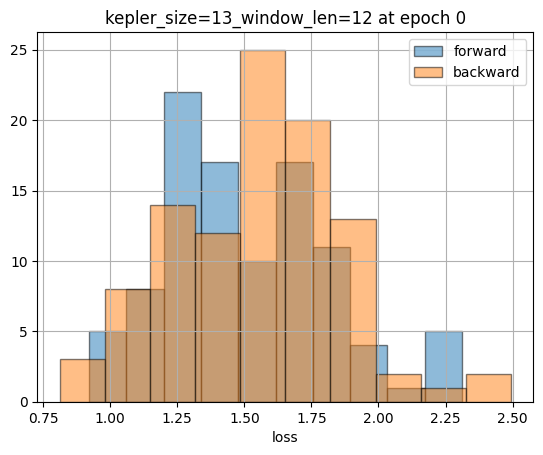

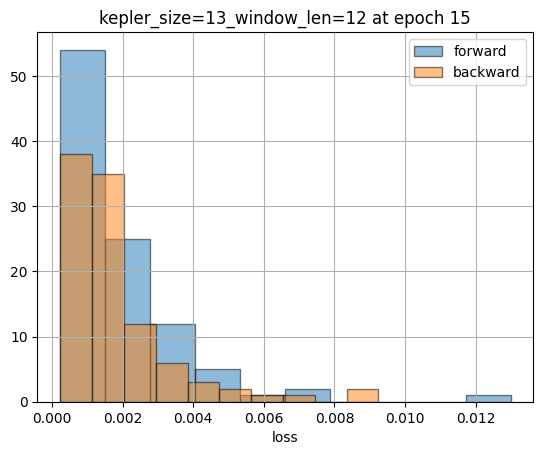

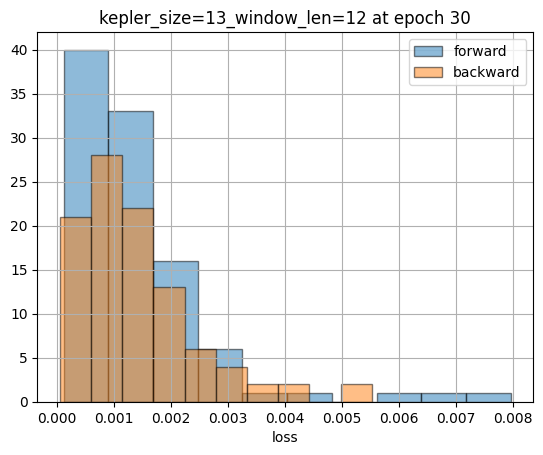

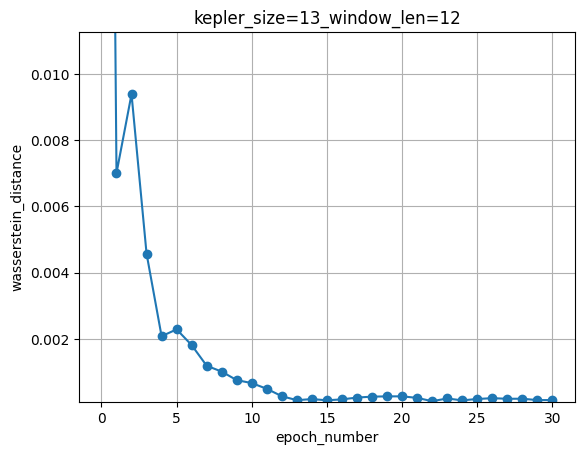

In [8]:
all_plots_for_datafile("20230507_distributions/kepler_size=13_window_len=12.json")

## kepler_size=13_window_len=25

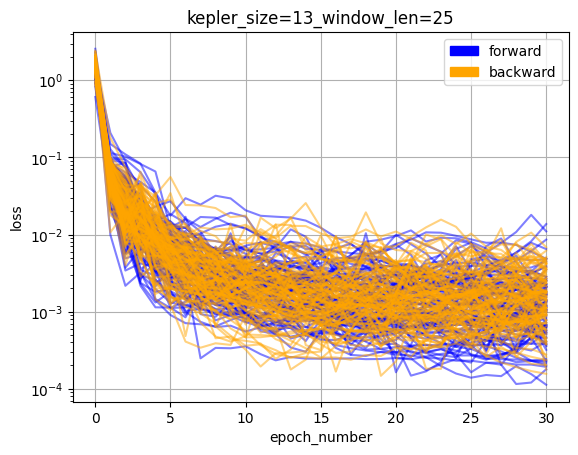

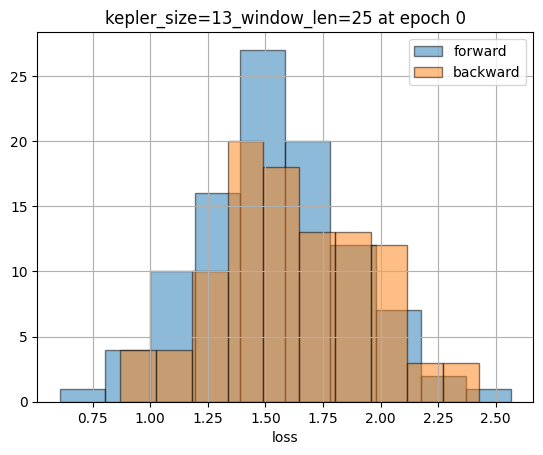

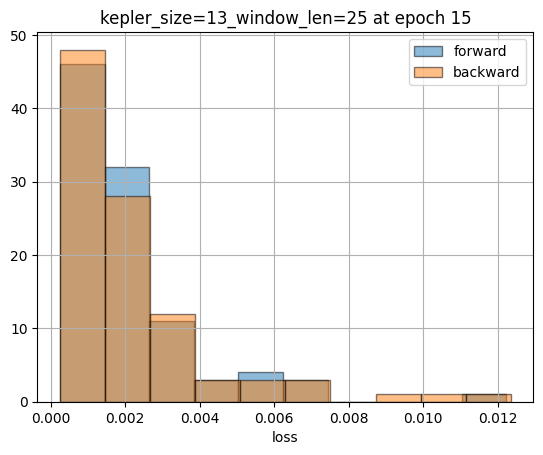

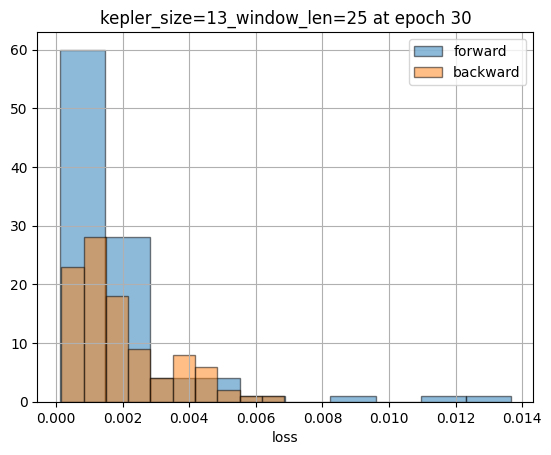

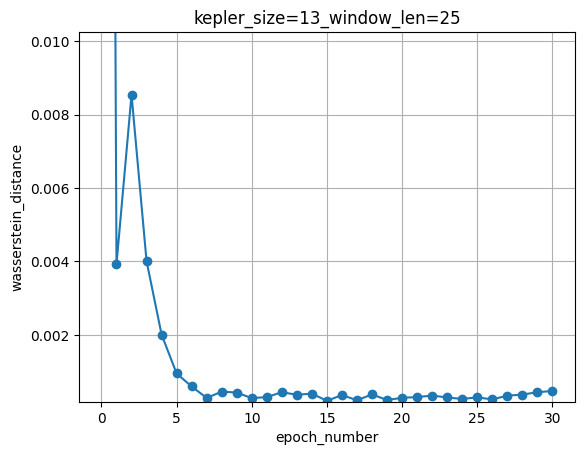

In [9]:
all_plots_for_datafile("20230507_distributions/kepler_size=13_window_len=25.json")

## belousovzhabotinsky_size=13_window_len=5

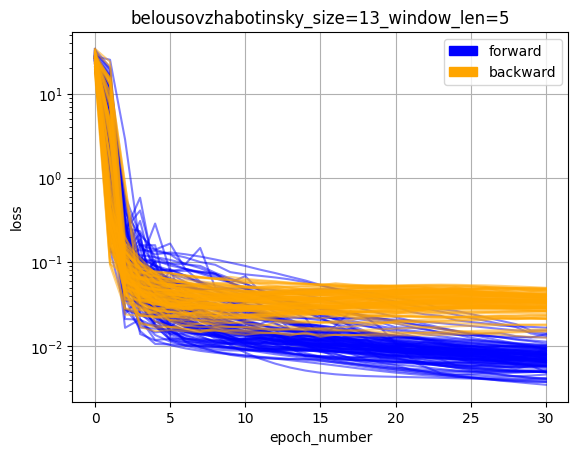

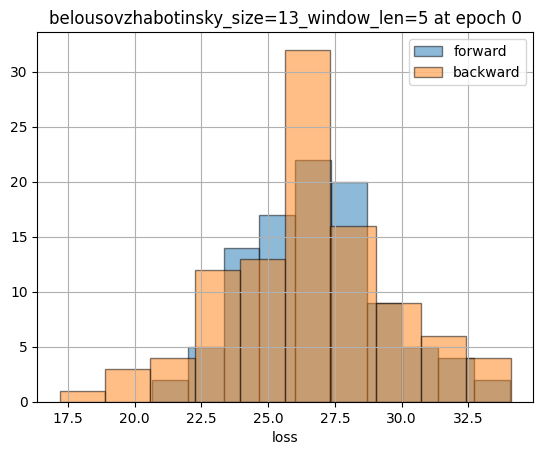

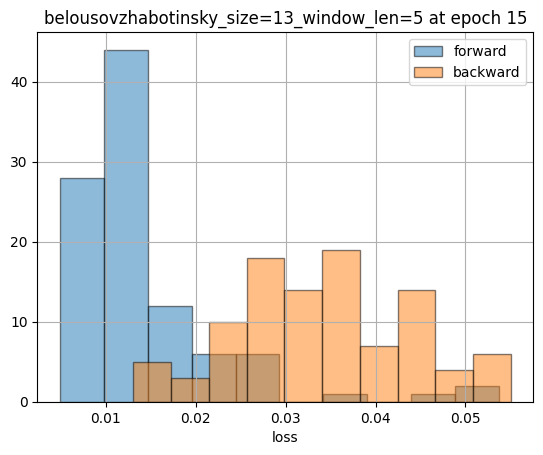

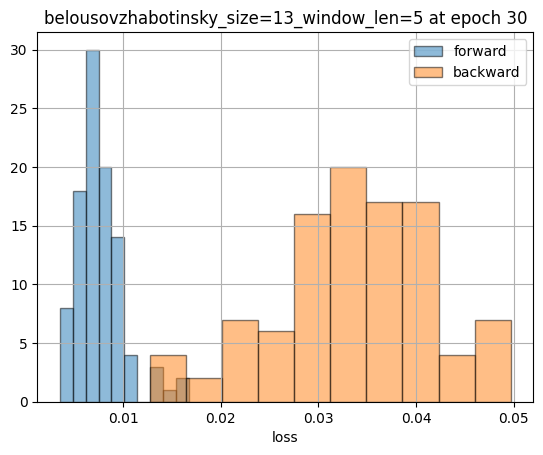

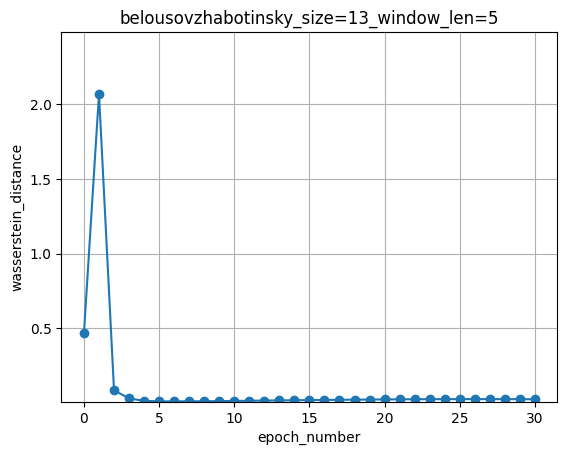

In [10]:
all_plots_for_datafile("20230507_distributions/belousovzhabotinsky_size=13_window_len=5.json")

## belousovzhabotinsky_size=13_window_len=12

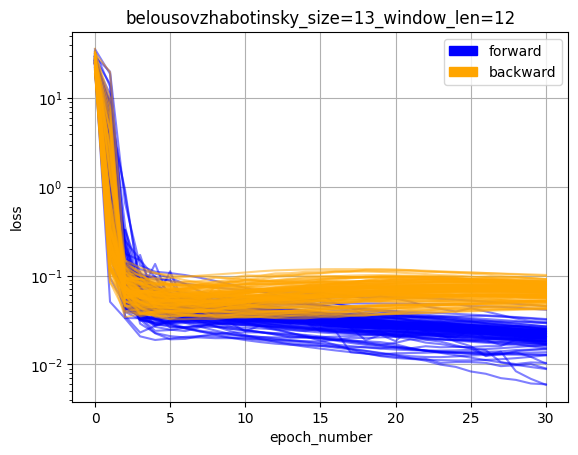

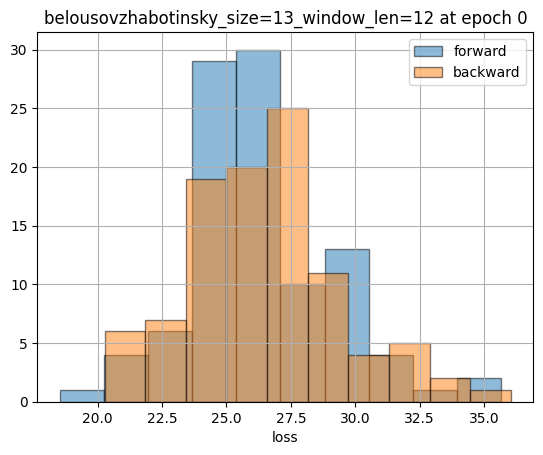

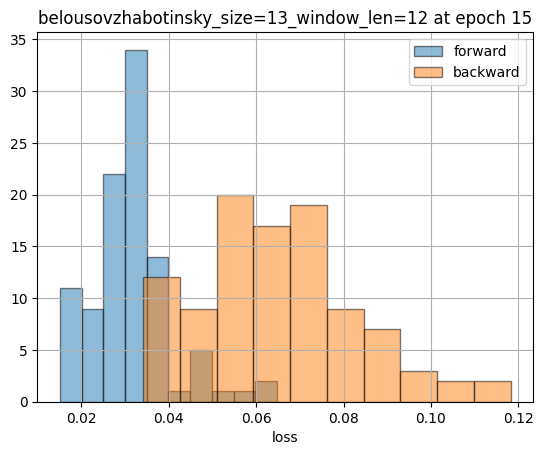

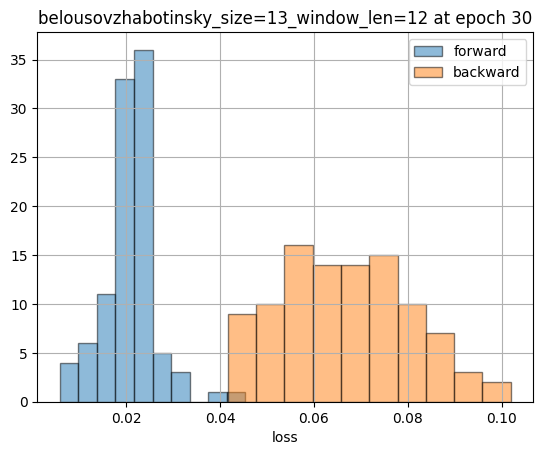

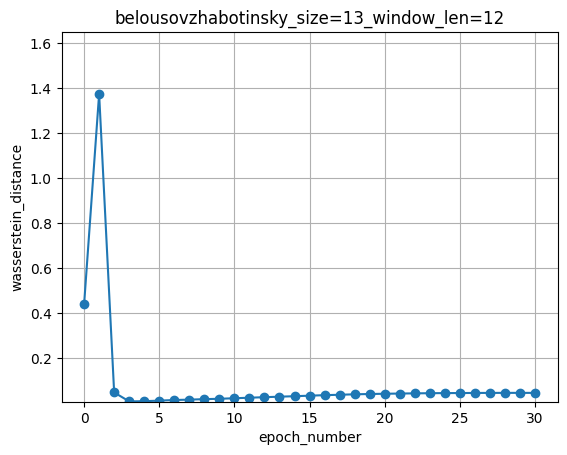

In [11]:
all_plots_for_datafile("20230507_distributions/belousovzhabotinsky_size=13_window_len=12.json")

## belousovzhabotinsky_size=13_window_len=25

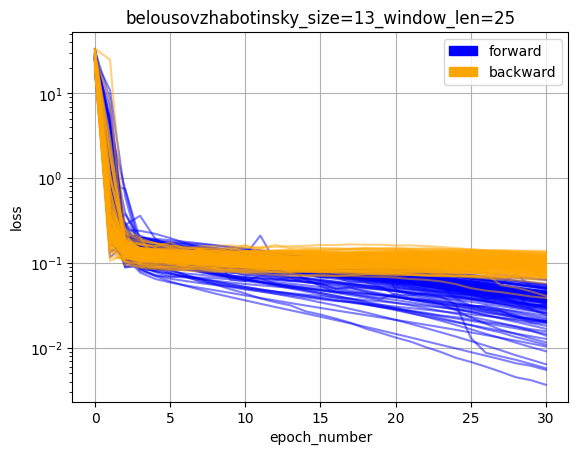

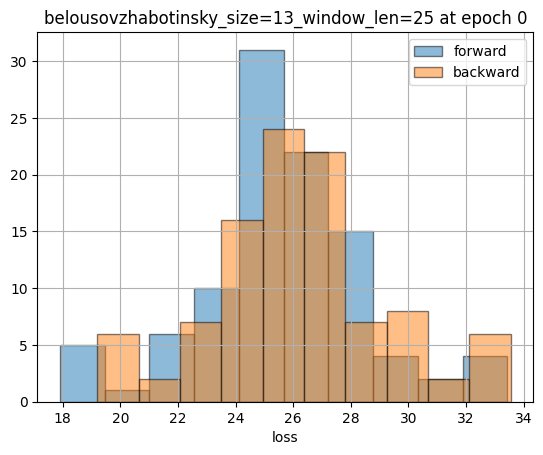

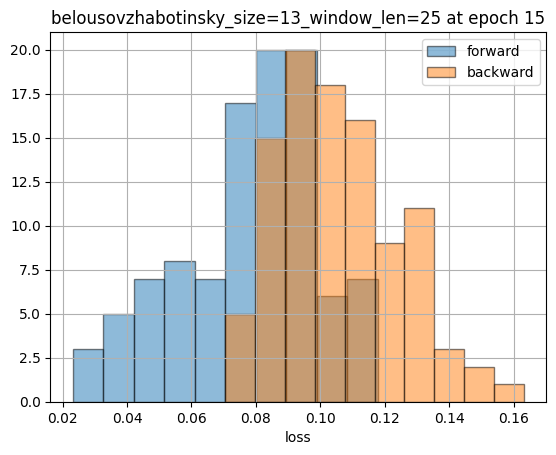

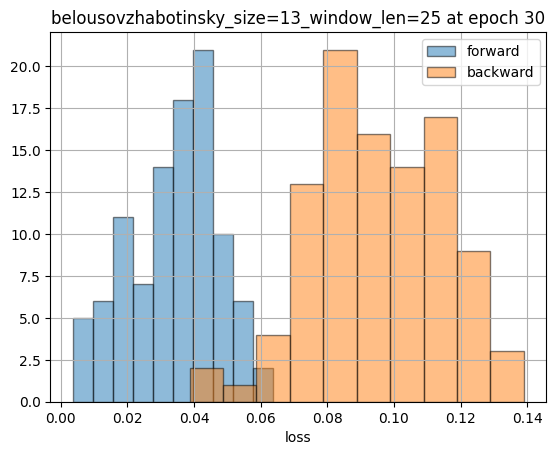

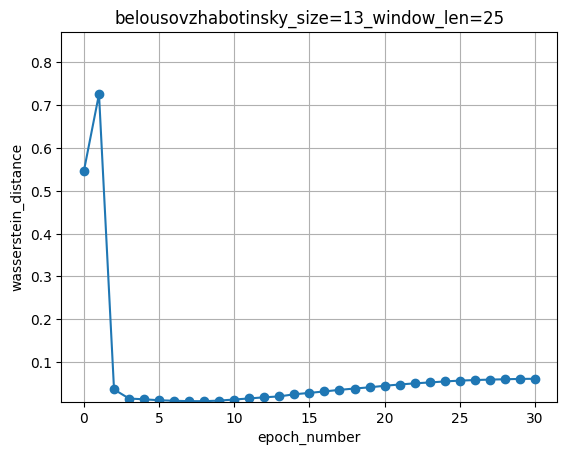

In [12]:
all_plots_for_datafile("20230507_distributions/belousovzhabotinsky_size=13_window_len=25.json")

## doublependulum_size=13_window_len=5

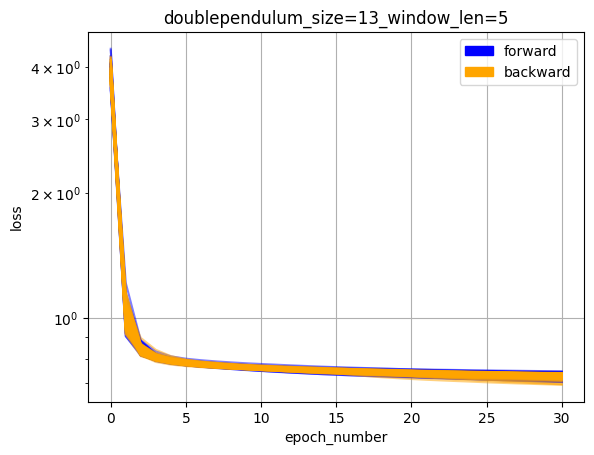

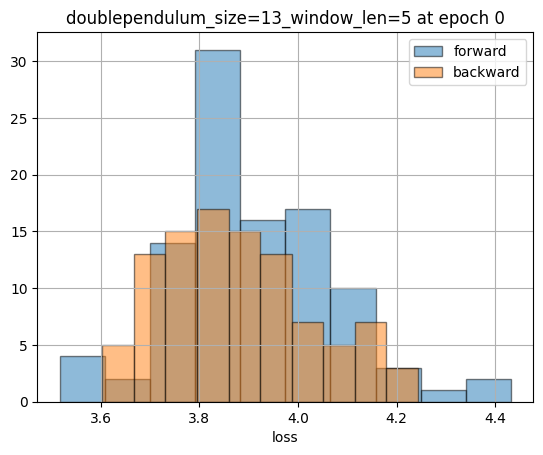

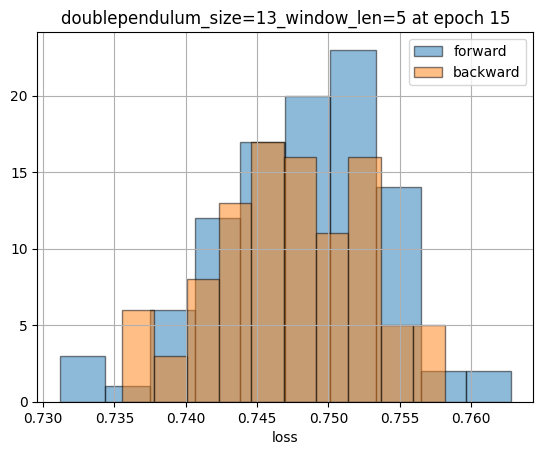

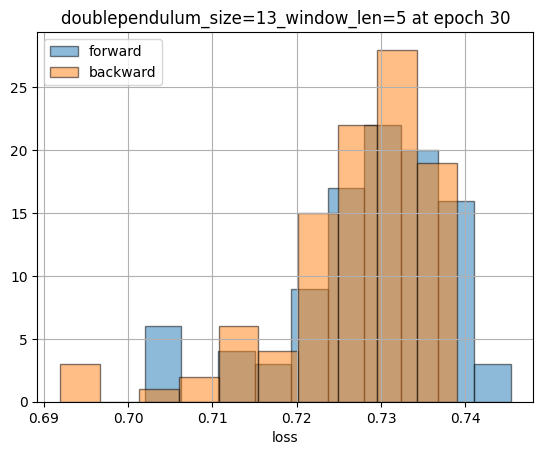

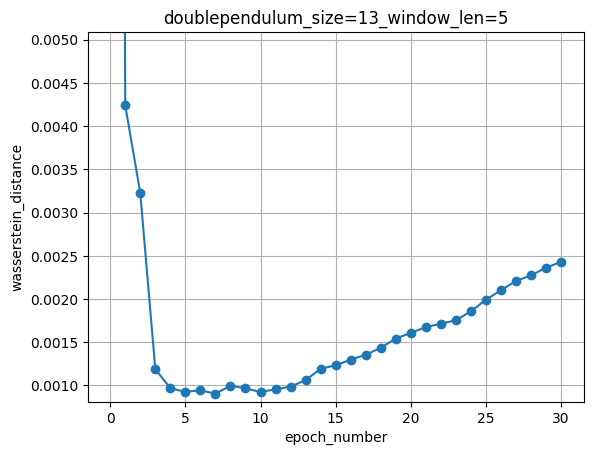

In [13]:
all_plots_for_datafile("20230507_distributions/doublependulum_size=13_window_len=5.json")

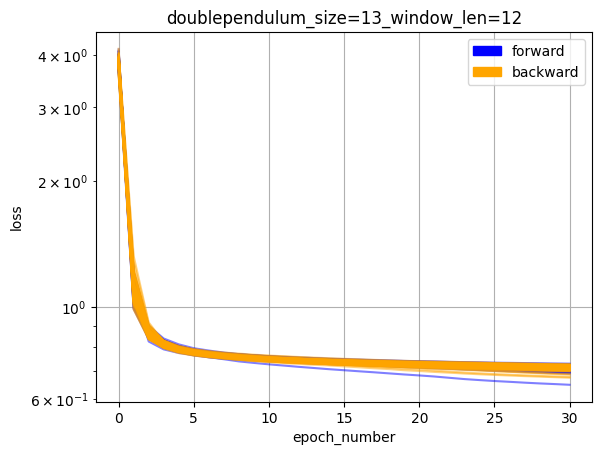

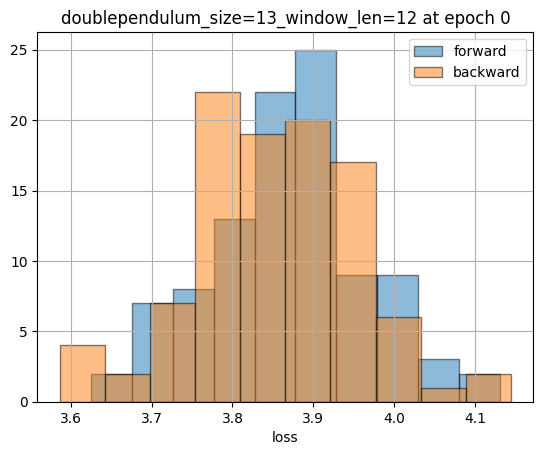

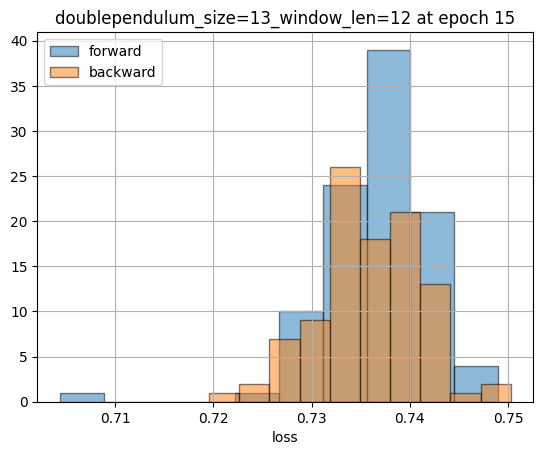

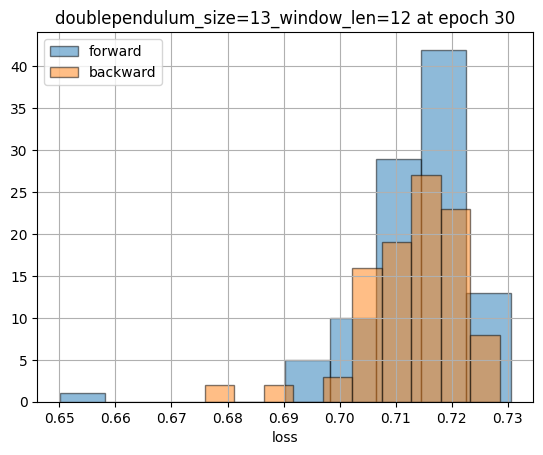

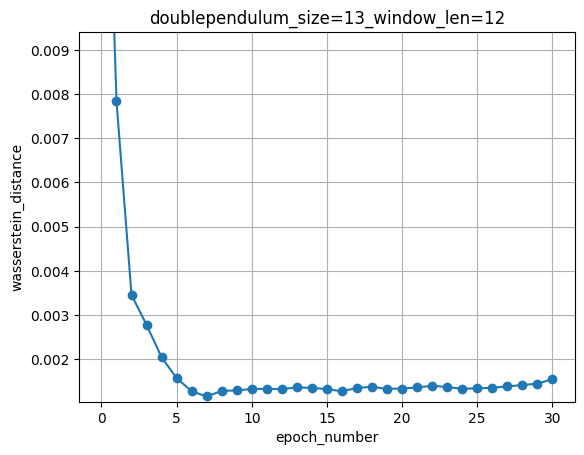

In [14]:
all_plots_for_datafile("20230507_distributions/doublependulum_size=13_window_len=12.json")

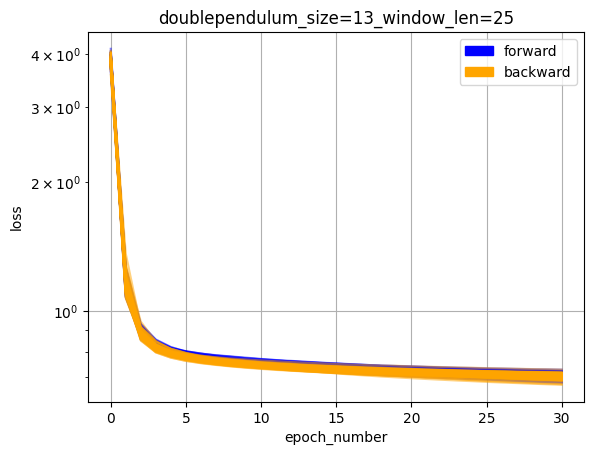

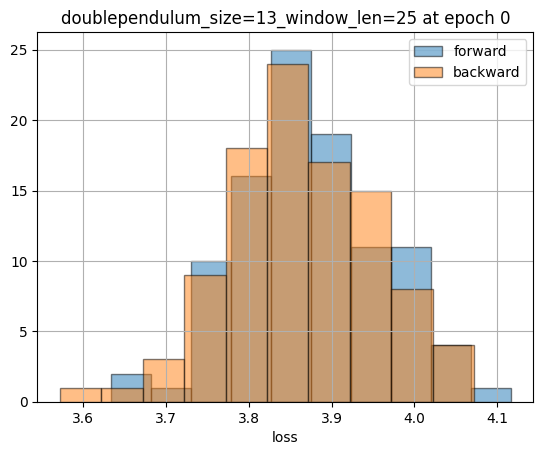

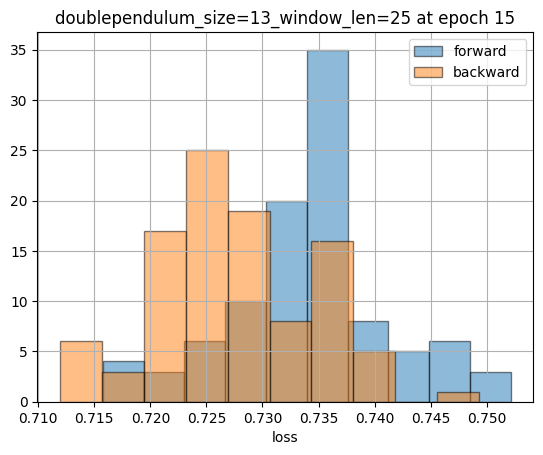

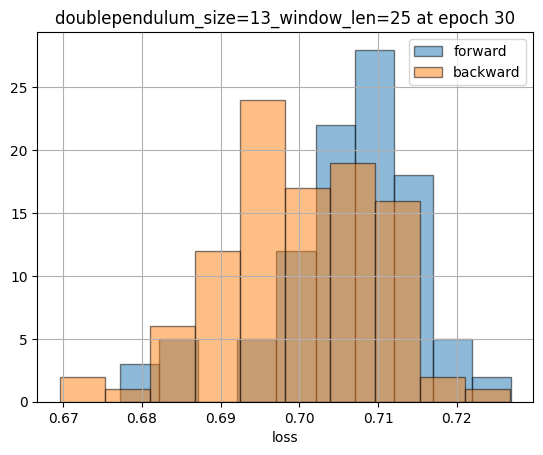

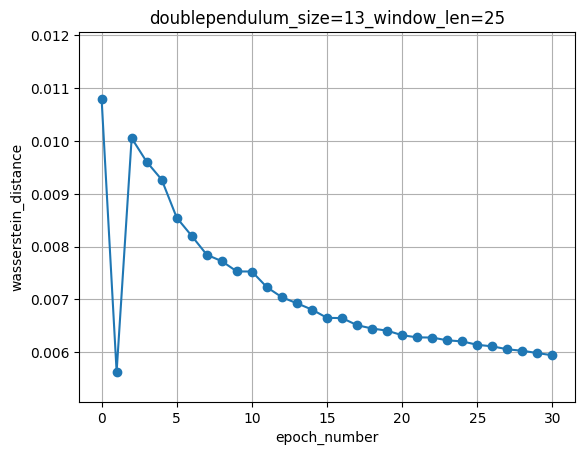

In [15]:
all_plots_for_datafile("20230507_distributions/doublependulum_size=13_window_len=25.json")

## All relmeandiffs in one plot

In [16]:
root, _, files = next(os.walk("20230507_distributions/"))
files = [os.path.join(root, f) for f in files if "friction" not in f and "damped" not in f]
loss_distributions = [LossDistribution(path) for path in files]

files

['20230507_distributions/doublependulum_size=13_window_len=5.json',
 '20230507_distributions/doublependulum_size=13_window_len=12.json',
 '20230507_distributions/kepler_size=13_window_len=5.json',
 '20230507_distributions/lorenz_size=13_window_len=5.json',
 '20230507_distributions/kepler_size=13_window_len=12.json',
 '20230507_distributions/belousovzhabotinsky_size=13_window_len=25.json',
 '20230507_distributions/kepler_size=13_window_len=25.json',
 '20230507_distributions/belousovzhabotinsky_size=13_window_len=5.json',
 '20230507_distributions/lorenz_size=13_window_len=25.json',
 '20230507_distributions/doublependulum_size=13_window_len=25.json',
 '20230507_distributions/lorenz_size=13_window_len=12.json',
 '20230507_distributions/belousovzhabotinsky_size=13_window_len=12.json']

In [17]:
def plot_relmeandiffs(loss_distributions: List[LossDistribution]) -> None:
    for l in loss_distributions:
        plt.plot(l.relmeandiff_all(), "o-", label=l.label)    
    plt.grid()
    plt.xlabel("epoch_number")
    plt.ylabel("relative difference in mean loss")
    plt.legend(prop={"size":6})
    plt.show()
    
def plot_wassersteins(loss_distributions: List[LossDistribution]) -> None:
    for l in loss_distributions:
        plt.plot(l.normalized_wasserstein_all(), "o-", label=l.label)    
    plt.grid()
    plt.xlabel("epoch_number")
    plt.ylabel("normalized wasserstein distance")
    plt.legend(prop={"size":6})
    plt.show()
    
def plot_lqrt(loss_distributions: List[LossDistribution]) -> None:
    for l in loss_distributions:
        plt.plot(l.lqrtest_all(), "o-", label=l.label)    
    plt.grid()
    plt.xlabel("epoch_number")
    plt.ylabel("lqrt pvalue")
    plt.legend(prop={"size":6})
    plt.show()

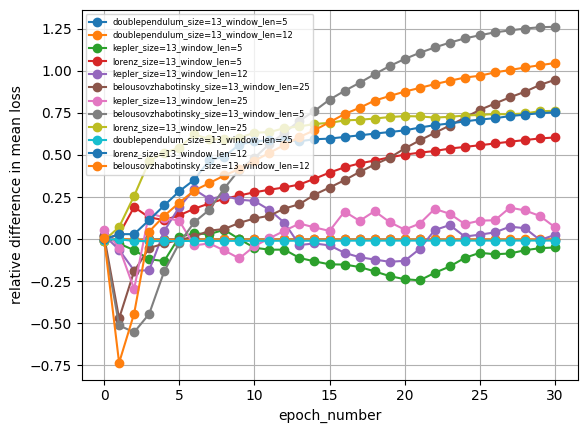

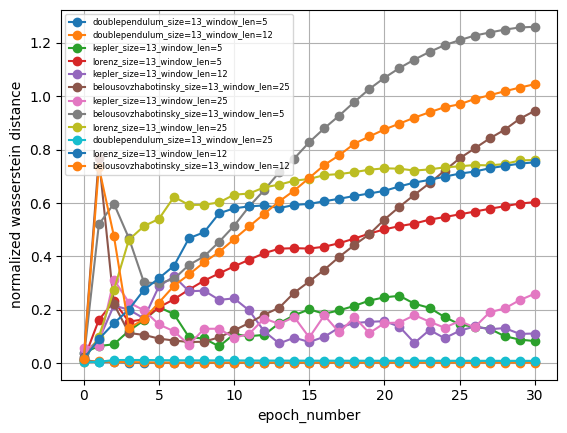

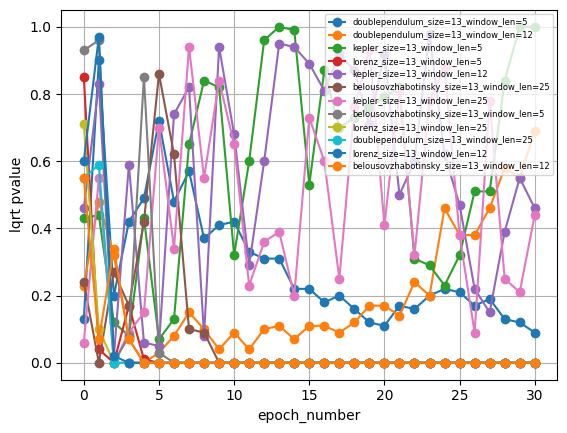

In [18]:
plot_relmeandiffs(loss_distributions)
plot_wassersteins(loss_distributions)
plot_lqrt(loss_distributions)

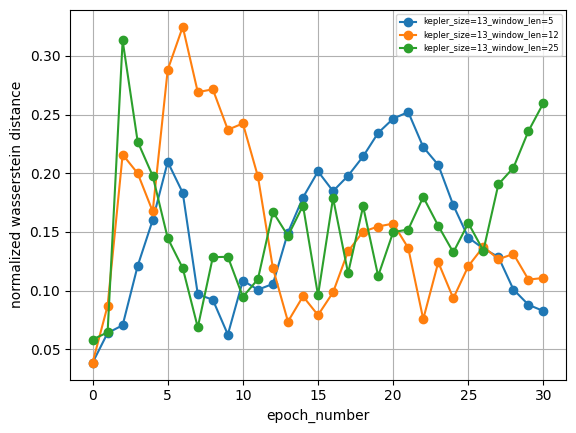

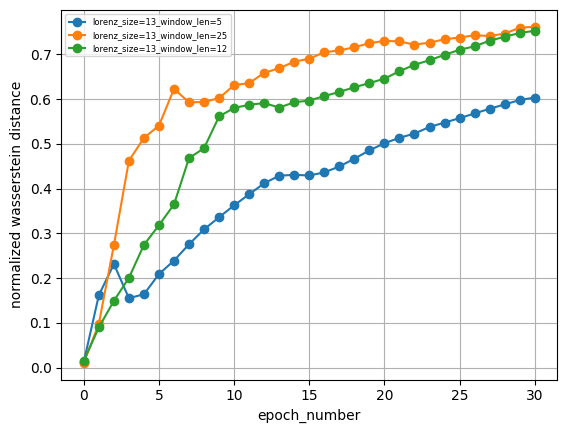

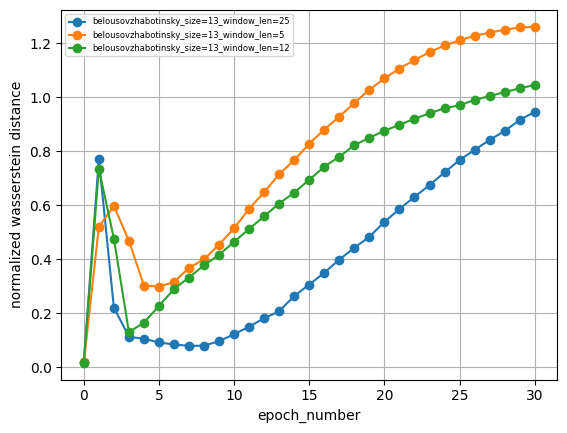

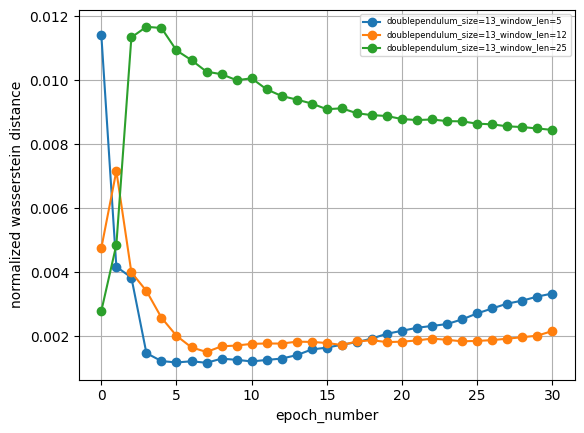

In [19]:
plot_wassersteins([l for l in loss_distributions if "kepler" in l.filepath])
plot_wassersteins([l for l in loss_distributions if "lorenz" in l.filepath])
plot_wassersteins([l for l in loss_distributions if "belousov" in l.filepath])
plot_wassersteins([l for l in loss_distributions if "doublependulum" in l.filepath])

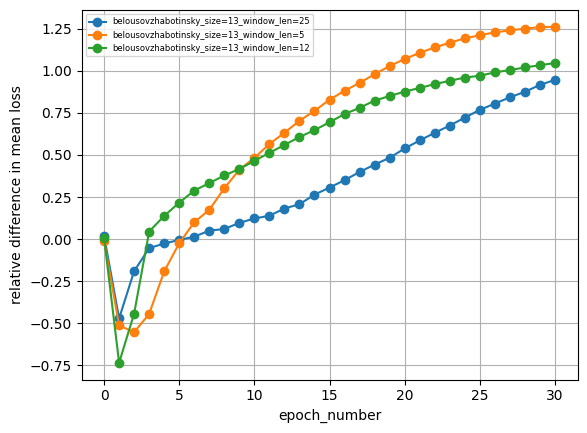

In [21]:
plot_relmeandiffs([l for l in loss_distributions if "belousov" in l.filepath])

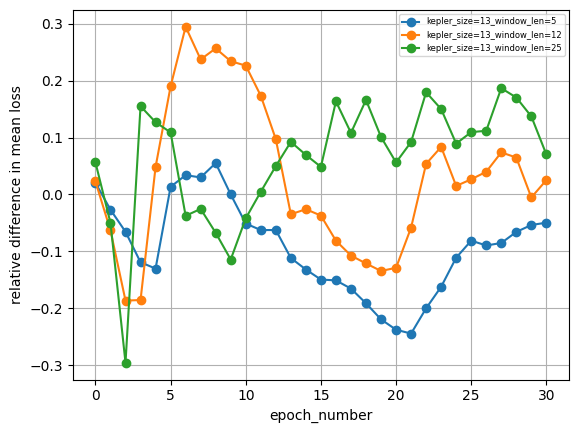

In [22]:
plot_relmeandiffs([l for l in loss_distributions if "kepler" in l.filepath])

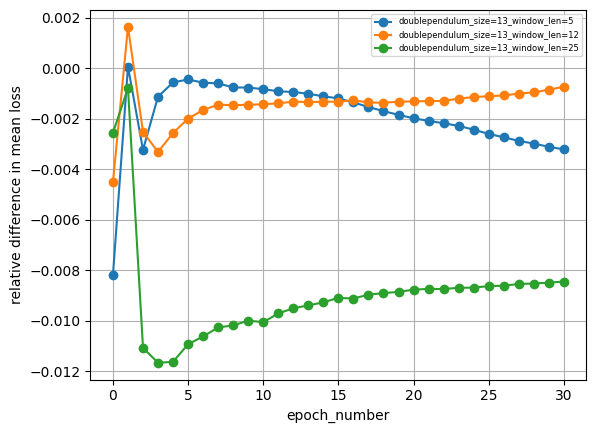

In [23]:
plot_relmeandiffs([l for l in loss_distributions if "doublependulum" in l.filepath])

In [24]:
for l in loss_distributions:
    print(l.label, np.stack(l.at_epoch(30)).mean())

doublependulum_size=13_window_len=5 0.7276648959947662
doublependulum_size=13_window_len=12 0.7133615535492135
kepler_size=13_window_len=5 0.0012650635395759797
lorenz_size=13_window_len=5 0.13623142041087608
kepler_size=13_window_len=12 0.0013984972433972371
belousovzhabotinsky_size=13_window_len=25 0.06454627464067335
kepler_size=13_window_len=25 0.0018311696248265092
belousovzhabotinsky_size=13_window_len=5 0.020584867112019022
lorenz_size=13_window_len=25 0.29596814777204505
doublependulum_size=13_window_len=25 0.7029774234085582
lorenz_size=13_window_len=12 0.1975877593439016
belousovzhabotinsky_size=13_window_len=12 0.04394986778399223
